# lecture

In [ ]:
# Generate data
n = 500
p = 2
y = c(rep(0,n/2),rep(1,n/2))
x_class1 = matrix(rnorm(n/2*p),n/2,p)-1
x_class2 = matrix(rnorm(n/2*p),n/2,p)+1
x = rbind(x_class1,x_class2)
data = as.data.frame(cbind(y,x))
names(data) = c("y",paste("x",1:p,sep=""))

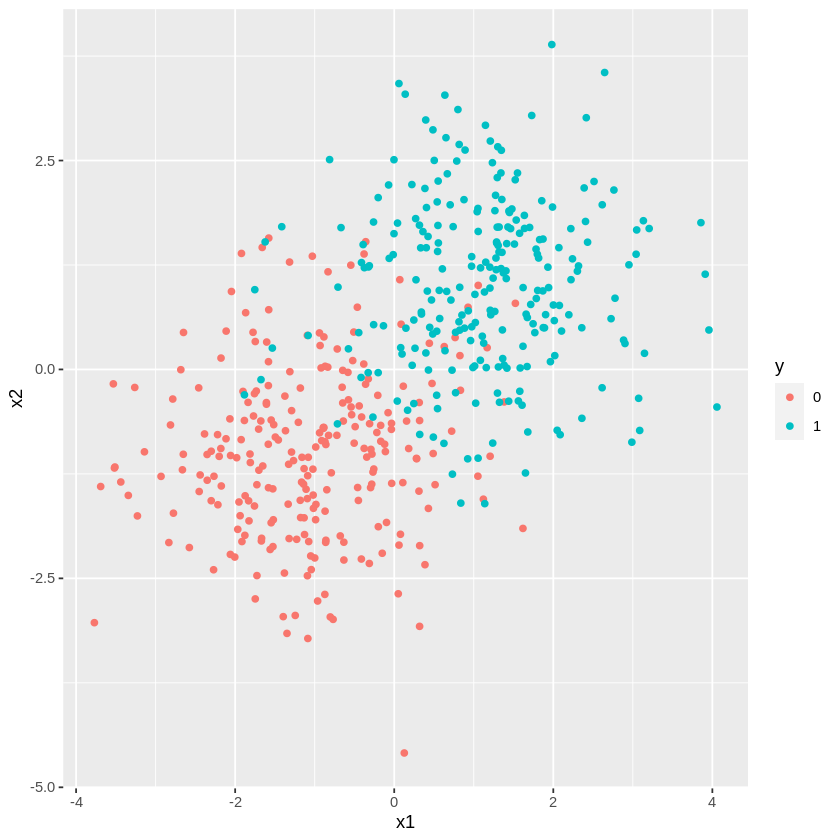

In [ ]:
library(ggplot2)
data$y=as.factor(data$y)
qplot(x=x1, y=x2, data=data, color=y)

In [ ]:
mylogistic <- function(y,x,method="Hessian"){
  maxIter = 500
  n = dim(x)[1]
  p = dim(x)[2]
  
  x = cbind(matrix(1,n,1),x)
  XtX = t(x)%*%x
  
  w_old = matrix(0,p+1,1)
  prob = 1/(1+exp(-x%*%w_old))
  
  for (iter in 1:maxIter){
    if (method == "Hessian"){
      R = prob*(1-prob)
      temp = matrix(rep(sqrt(R),p+1),n,p+1)*x
      XRX = t(temp)%*% temp
      print(dim(XRX))
      print(dim(x))
      print(head(y))
      print(head(x))
      # Newton-Raphson update
      invH = solve(XRX)
      w = w_old + invH%*%(t(x)%*%(y-prob)) 
    }
    else{
      # This is a method using the upper bound of Hessian
      # Because prob*(1-prob) <= 0.25
      # We replace prob*(1-prob) by 0.25
      z =  0.25*x%*%w_old + (y-prob);
      w = solve(0.25*XtX)%*%(t(x)%*%z);
    }
    if (max(abs(w_old-w))/sqrt(sum(w^2)) < 1e-6){
      break
    }
    prob = 1/(1+exp(-x%*%w))
    prob[prob>0.999] = 0.999
    prob[prob<0.001] = 0.001
    
    w_old = w
  }
  
  se = sqrt(diag(invH))
  return(list(prob=prob,w=w,se=se,Iter = iter)) 
}

my.fit<- mylogistic(y=as.numeric(data$y)-1,x=as.matrix(data[,2:3]),method="Hessian")
my.fit$w
my.fit$Iter
my.fit$se

[1] 3 3
[1] 500   3
[1] 0 0 0 0 0 0
                x1         x2
[1,] 1  0.12659086 -4.5895758
[2,] 1 -0.03163877 -1.3629730
[3,] 1 -0.49113651 -0.6847367
[4,] 1  0.31910440 -3.0741642
[5,] 1 -1.91471683 -2.0595230
[6,] 1 -1.24454158 -2.9436834
[1] 3 3
[1] 500   3
[1] 0 0 0 0 0 0
                x1         x2
[1,] 1  0.12659086 -4.5895758
[2,] 1 -0.03163877 -1.3629730
[3,] 1 -0.49113651 -0.6847367
[4,] 1  0.31910440 -3.0741642
[5,] 1 -1.91471683 -2.0595230
[6,] 1 -1.24454158 -2.9436834
[1] 3 3
[1] 500   3
[1] 0 0 0 0 0 0
                x1         x2
[1,] 1  0.12659086 -4.5895758
[2,] 1 -0.03163877 -1.3629730
[3,] 1 -0.49113651 -0.6847367
[4,] 1  0.31910440 -3.0741642
[5,] 1 -1.91471683 -2.0595230
[6,] 1 -1.24454158 -2.9436834
[1] 3 3
[1] 500   3
[1] 0 0 0 0 0 0
                x1         x2
[1,] 1  0.12659086 -4.5895758
[2,] 1 -0.03163877 -1.3629730
[3,] 1 -0.49113651 -0.6847367
[4,] 1  0.31910440 -3.0741642
[5,] 1 -1.91471683 -2.0595230
[6,] 1 -1.24454158 -2.9436834
[1] 3 3
[1] 500 

,-0.1002132
x1,1.8021918
x2,1.5956605


[1] 9

x1        x2 
0.1772225 0.2031995 0.1978344

# Coding Problem

In [1]:
# https://drive.google.com/file/d/1LE9ELZNOh9_LQxNt5ExjnITFwPUZ3n_Q/view?usp=sharing
system("gdown --id 1LE9ELZNOh9_LQxNt5ExjnITFwPUZ3n_Q")
lambda = read.delim("lambda.txt", header=FALSE)
lambda = as.data.frame(lambda)

# https://drive.google.com/file/d/14w6xx-JQsKVY38iuUX1a-Kkm3z0bjlMC/view?usp=sharing
system("gdown --id 14w6xx-JQsKVY38iuUX1a-Kkm3z0bjlMC")
train = read.delim("train.txt")
data = as.data.frame(train)

[1] 2.044526

[1] 776185239811

[1] -2.101367

[1] -1.350799e+12

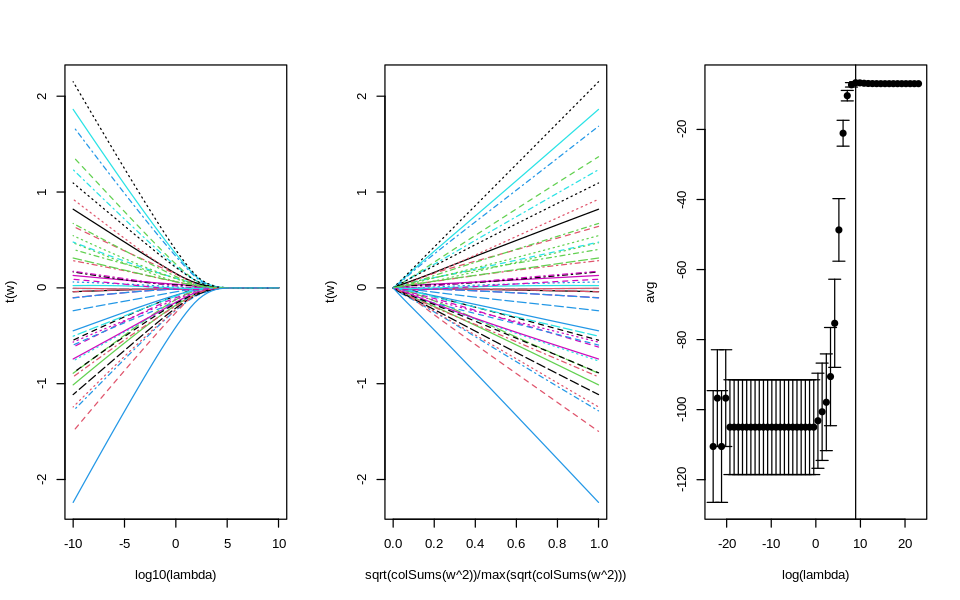

In [81]:
a = 0.999999999999
b = 1-a

mylogistic2 <- function(y,x,method="Hessian",lambda=0,w_old=NULL){
  maxIter = 25
  n = dim(x)[1]
  p = dim(x)[2]
  
  x = cbind(matrix(1,n,1),x)
  XtX = t(x)%*%x
  
  if (is.null(w_old)){
      w_old = matrix(0,p+1,1)
  }
  prob = 1/(1+exp(-x%*%w_old))
  
  for (iter in 1:maxIter){
    if (method == "Hessian"){
      R = prob*(1-prob)
      temp = matrix(rep(sqrt(R),p+1),n,p+1)*x
      XRX = t(temp)%*% temp
      l2 <- matrix(0, p+1, p+1)
      diag(l2) <- lambda
      # Newton-Raphson update
      invH = solve(XRX + l2)
      w = w_old + invH%*%(t(x)%*%(y-prob) - lambda*w_old) 
    }
    else{
      # This is a method using the upper bound of Hessian
      # Because prob*(1-prob) <= 0.25
      # We replace prob*(1-prob) by 0.25
      z =  0.25*x%*%w_old + (y-prob);
      w = solve(0.25*XtX)%*%(t(x)%*%z);
    }
    if (max(abs(w_old-w))/sqrt(sum(w^2)) < 1e-3){
      break
    }
    prob = 1/(1+exp(-x%*%w))
    # prob[prob>a] = a
    # prob[prob<b] = b
    
    w_old = w
  }
  
  se = sqrt(diag(invH))
  return(list(prob=prob,w=w,se=se,Iter = iter)) 
}

w <- matrix(0, 46, nrow(lambda))
w_old = NULL
for(i in 1:nrow(lambda)) {
    my.fit<- mylogistic2(y=as.numeric(data$y),x=as.matrix(data[,2:46]),method="Hessian",lambda=lambda[i,],w_old=w_old)
    w[,i] = my.fit$w
    w_old = my.fit$w
}

options(repr.plot.width=8, repr.plot.height=5)
par(mfrow=c(1,3))
matplot(x=log10(lambda), y=t(w), type='l')
matplot(x=sqrt(colSums(w^2))/max(sqrt(colSums(w^2))), y=t(w), type='l')

nfolds <- 10
n <- nrow(data)

set.seed(200)
dat_idx <- sample(1:n,n,replace = F)
cv_err <- matrix(0,nfolds,nrow(lambda))
for(i in 1:nfolds){
    idx_test <- dat_idx[((i-1)*n/nfolds+1):(i*n/nfolds)]
    w_old = NULL

    for (j in 1:nrow(lambda)){
        my.fit<- mylogistic2(y=as.numeric(data$y[-idx_test])-1,x=as.matrix(data[-idx_test,2:46]),method="Hessian",lambda=lambda[j,],w_old=w_old)
        w_old = my.fit$w
        w = my.fit$w
        x = as.matrix(data[idx_test,2:46])
        x = cbind(matrix(1,length(idx_test),1),x)
        pred = 1/(1+exp(-x%*%w))
        pred[pred>a] = a
        pred[pred<b] = b
        y = data$y[idx_test]
        cv_err[i,j] <- sum(y*log(pred)+(1-y)*log(1-pred))
        # print(my.fit$Iter)
    }
}

sd = apply(cv_err, 2, sd)/sqrt(10)
avg = colMeans(cv_err)
matplot(x=log(lambda), y=avg, ylim=range(c(avg-sd, avg+sd)), pch=19)
abline(v=log(lambda)[which.max(avg),])
options(warn=-1)
arrows(log(lambda)[,], avg-sd, log(lambda)[,], avg+sd, length=0.05, angle=90, code=3)

glm.fit = glm(y~.-y,family = "binomial",data=data)

max(glm.fit$coefficients)
max(my.fit$w)
min(glm.fit$coefficients)
min(my.fit$w)
# print(glm.fit$coefficients-my.fit$w)

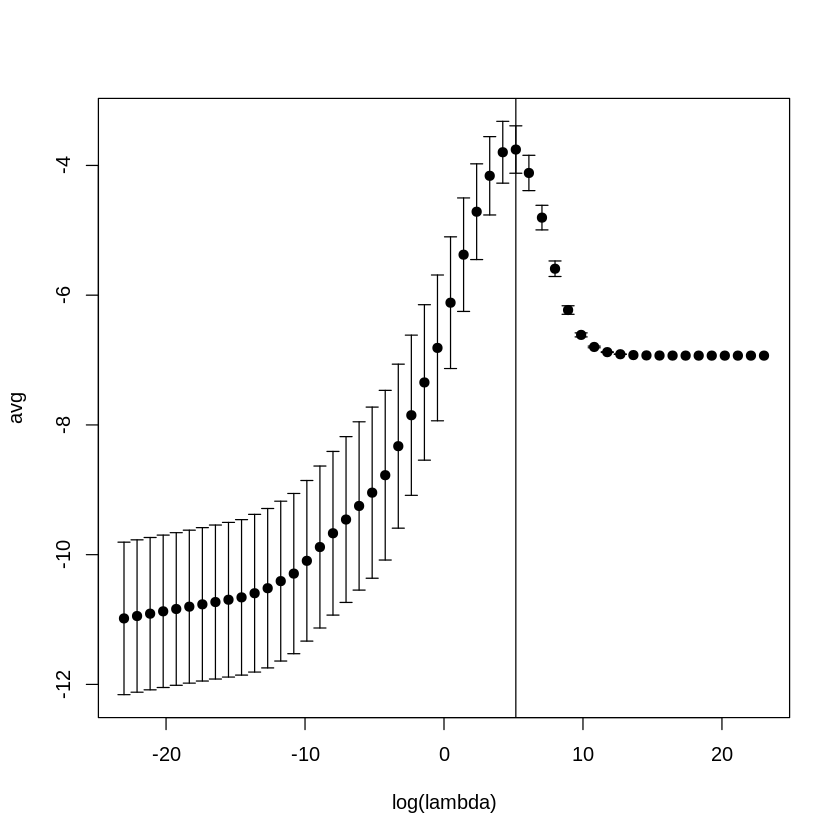

In [ ]:
nfolds <- 10
n <- nrow(data)

set.seed(200)
dat_idx <- sample(1:n,n,replace = F)
cv_err <- matrix(0,nfolds,nrow(lambda))
for(i in 1:nfolds){
    idx_test <- dat_idx[((i-1)*n/nfolds+1):(i*n/nfolds)]
    w_old = NULL

    for (j in 1:nrow(lambda)){
        my.fit<- mylogistic2(y=as.numeric(data$y[-idx_test]),x=as.matrix(data[-idx_test,2:46]),method="Hessian",lambda=lambda[j,],w_old=w_old)
        w_old = my.fit$w
        w = my.fit$w
        x = as.matrix(data[idx_test,2:46])
        x = cbind(matrix(1,length(idx_test),1),x)
        pred = 1/(1+exp(-x%*%w))
        pred[pred>0.999] = 0.999
        pred[pred<0.001] = 0.001
        y = data$y[idx_test]
        cv_err[i,j] <- sum(y*log(pred)+(1-y)*log(1-pred))
    }
}

sd = apply(cv_err, 2, sd)/sqrt(10)
avg = colMeans(cv_err)
matplot(x=log(lambda), y=avg, ylim=range(c(avg-sd, avg+sd)), pch=19)
abline(v=log(lambda)[which.max(avg),])
options(warn=-1)
arrows(log(lambda)[,], avg-sd, log(lambda)[,], avg+sd, length=0.05, angle=90, code=3)

# check

In [ ]:
data

y,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.8475635,3.7940500,10.3980721,-9.0928605,14.6867674,-3.5367670,9.4105187,-1.9829262,2.3041259,⋯,3.57324064,-13.1994357,-6.3975695,-8.907092041,2.4047810,-4.348280,-5.6325828,-11.2701027,2.8921974,12.1581354
1,2.2646034,2.2216297,-2.2839117,-4.1757954,12.4859478,-19.2974684,-9.2086119,-3.8642550,-21.0615552,⋯,-0.99207833,2.9733846,5.6691075,2.938531361,-0.4417203,2.209550,-5.9152100,-10.9377316,-5.4327064,-10.7768336
1,4.3255650,9.1117537,5.7324559,8.5326160,-13.8472266,-7.6062154,4.2475019,13.0405122,-2.6119790,⋯,1.09040610,3.2802119,6.6203277,-0.820095069,12.3647219,8.167058,-8.7183204,1.1672550,-0.6385795,-1.4365072
1,5.5806524,-11.9379377,7.3131372,10.8015029,0.5161507,23.3743130,-23.8671457,-14.5528336,19.4243350,⋯,-13.04094090,4.1000490,17.1761218,-6.168519858,12.5292352,-7.580183,2.1562039,-20.9500344,9.8449893,3.0265274
0,0.5975527,-6.6990736,-5.6747387,-1.2009879,0.1706795,-20.6693134,-5.0767589,0.6436884,-1.7290232,⋯,-9.19286354,-5.4617934,-14.3027082,13.320322159,-6.0557405,3.672448,-9.0628839,3.6765028,-2.9764163,-1.6627973
1,-1.1464087,-11.7897525,-7.7161916,-3.8076896,-29.1899376,-10.4015073,-11.1901006,15.4834413,-0.9467367,⋯,16.75050966,-8.7927137,15.1001124,8.194379795,4.4418406,3.793294,-10.0747578,6.2663362,-9.2523245,5.5225010
0,-10.2057835,-22.3056407,2.7669002,3.4234042,-13.1257912,2.9603350,-0.4863901,-0.3611371,1.0442410,⋯,20.97896469,12.0302043,14.8475470,17.867842394,-24.4939935,-8.840951,-5.9355663,-5.8573969,-4.5350462,20.3925384
0,-2.9705130,-0.9823648,-3.9824345,6.2890311,-7.8075123,-3.8480170,4.1128813,-0.7572716,-17.6124842,⋯,-0.01658630,-0.6087557,-4.1018929,12.081439210,-19.5980337,8.815624,-7.1260796,3.4183659,1.9990688,2.0242926
0,1.6815003,7.7596707,12.2714483,26.2592039,-2.1892453,-3.0733969,-9.5673792,-5.5322423,5.0039058,⋯,14.69247173,6.6961911,5.9011110,-0.004202326,24.8574865,11.885657,9.0371150,-11.4811938,0.6835064,17.8531268


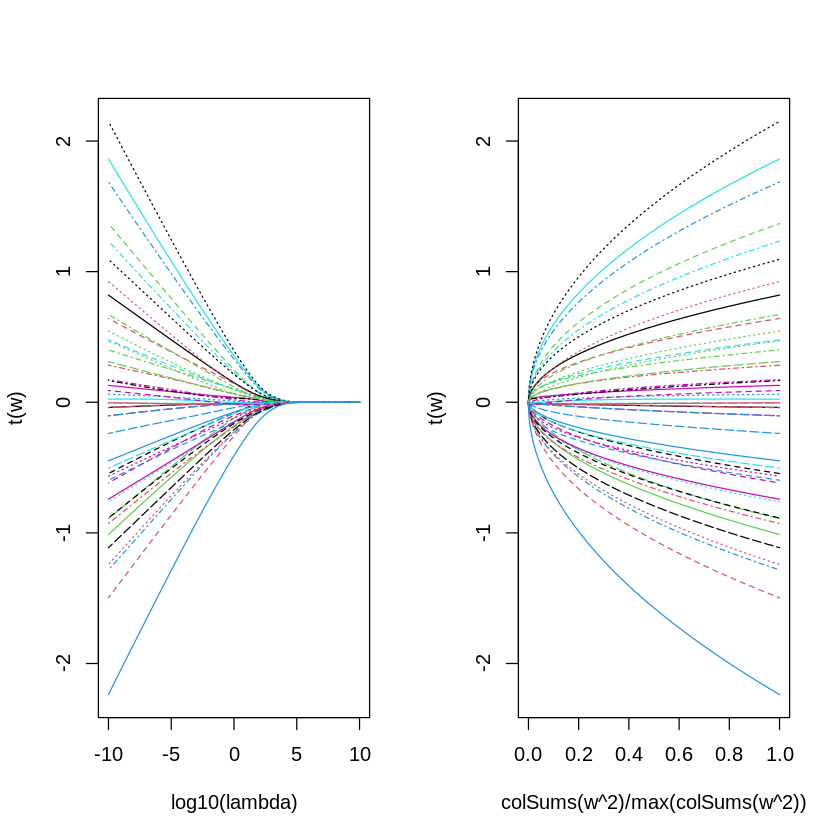

In [ ]:
mylogistic2 <- function(y,x,method="Hessian",lambda=0,w_old=NULL){
  maxIter = 500
  n = dim(x)[1]
  p = dim(x)[2]
  
  x = cbind(matrix(1,n,1),x)
  XtX = t(x)%*%x
  
  if (is.null(w_old)){
      w_old = matrix(0,p+1,1)
  }
  prob = 1/(1+exp(-x%*%w_old))
  
  for (iter in 1:maxIter){
    if (method == "Hessian"){
      R = prob*(1-prob)
      temp = matrix(rep(sqrt(R),p+1),n,p+1)*x
      XRX = t(temp)%*% temp
      l2 <- matrix(0, p+1, p+1)
      diag(l2) <- 2*lambda
      # Newton-Raphson update
      invH = solve(XRX + l2)
      w = w_old + invH%*%(t(x)%*%(y-prob) - 2*lambda*w_old) 
    }
    else{
      # This is a method using the upper bound of Hessian
      # Because prob*(1-prob) <= 0.25
      # We replace prob*(1-prob) by 0.25
      z =  0.25*x%*%w_old + (y-prob);
      w = solve(0.25*XtX)%*%(t(x)%*%z);
    }
    if (max(abs(w_old-w))/sqrt(sum(w^2)) < 1e-6){
      break
    }
    prob = 1/(1+exp(-x%*%w))
    # prob[prob>0.999] = 0.999
    # prob[prob<0.001] = 0.001
    
    w_old = w
  }
  
  se = sqrt(diag(invH))
  return(list(prob=prob,w=w,se=se,Iter = iter)) 
}

w <- matrix(0, 46, nrow(lambda))
w_old = NULL
for(i in 1:nrow(lambda)) {
    my.fit<- mylogistic2(y=as.numeric(data$y),x=as.matrix(data[,2:46]),method="Hessian",lambda=lambda[i,],w_old=w_old)
    w[,i] = my.fit$w
    w_old = my.fit$w
}

par(mfrow=c(1,2))
matplot(x=log10(lambda), y=t(w), type='l')
matplot(x=colSums(w^2)/max(colSums(w^2)), y=t(w), type='l')

In [33]:
glm.fit = glm(y~.-y,family = "binomial",data=data)

max(glm.fit$coefficients)
max(my.fit$w)
min(glm.fit$coefficients)
min(my.fit$w)
print(glm.fit$coefficients-my.fit$w)

[1] 2.044526

[1] 2.02671

[1] -2.101367

[1] -1.873284

           [,1]
    -1.03069618
X1  -0.44681880
X2   0.01725440
X3   0.17531993
X4  -0.85733486
X5   0.35014872
X6   0.11113373
X7  -0.22714196
X8   0.53164303
X9   0.36522021
X10 -0.30516425
X11 -0.44107318
X12 -0.31470678
X13  0.24755489
X14  0.30501422
X15  0.17656312
X16 -0.39405769
X17  0.16595204
X18 -0.12883319
X19 -0.31488153
X20 -0.07625250
X21  0.57084715
X22 -0.01311194
X23 -0.44539143
X24 -0.62162445
X25 -0.51028819
X26 -0.11824878
X27  0.15522945
X28 -0.32513566
X29  0.50670685
X30 -0.26436194
X31 -0.55130064
X32 -0.25604714
X33  0.48278699
X34  0.31233000
X35  0.55422503
X36  0.06100538
X37  1.17287343
X38  0.09007277
X39  0.29880617
X40 -0.24932024
X41  0.50720163
X42  0.73597519
X43 -0.42863267
X44  0.11881961
X45 -0.22808281


In [78]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’




In [ ]:
# https://drive.google.com/file/d/1LE9ELZNOh9_LQxNt5ExjnITFwPUZ3n_Q/view?usp=sharing
system("gdown --id 1LE9ELZNOh9_LQxNt5ExjnITFwPUZ3n_Q")
lambda = read.delim("lambda.txt", header=FALSE)
lambda = as.data.frame(lambda)

# https://drive.google.com/file/d/14w6xx-JQsKVY38iuUX1a-Kkm3z0bjlMC/view?usp=sharing
system("gdown --id 14w6xx-JQsKVY38iuUX1a-Kkm3z0bjlMC")
train = read.delim("train.txt")
data = as.data.frame(train)

In [79]:
library(glmnet)
ridge.mod=glmnet(y=(data$y)-1,x=data[,2:46],alpha=0,lambda=lambda[,])
par(mfrow=c(1,2))
w = coef(ridge.mod)[-1,]
matplot(x=log10(lambda), y=t(w), type='l')
matplot(x=colSums(w^2)/max(colSums(w^2)), y=t(w), type='l')

ERROR: ignored